## Submission to Kaggle Dogs and Cats Redux

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
path = "data/kaggle/dogscats/"
#path = "data/kaggle/dogscats/sample/"

In [3]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [4]:
import utils; reload(utils)
from utils import plots

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [5]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64

In [6]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [7]:
vgg = Vgg16()

In [8]:
batches = vgg.get_batches(path+'train', batch_size=4)

Found 23000 images belonging to 2 classes.


In [9]:
imgs,labels = next(batches)

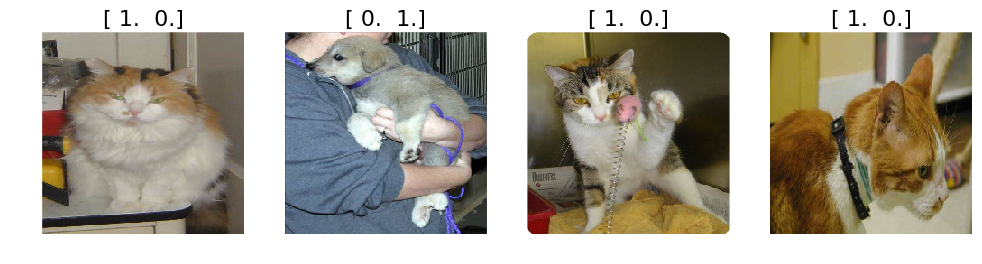

In [10]:
plots(imgs, titles=labels)

In [11]:
vgg.predict(imgs, True)

(array([ 0.8581,  0.4182,  0.184 ,  0.3808], dtype=float32),
 array([283, 250, 281, 263]),
 [u'Persian_cat', u'Siberian_husky', u'tabby', u'Pembroke'])

In [12]:
batch_size=64

In [13]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
vgg.finetune(batches)

In [15]:
vgg.fit(batches, val_batches, nb_epoch=2)

Epoch 1/2
23000/23000 [==============================] - 635s - loss: 0.1346 - acc: 0.9651 - val_loss: 0.0617 - val_acc: 0.9800
Epoch 2/2
23000/23000 [==============================] - 635s - loss: 0.0994 - acc: 0.9770 - val_loss: 0.0620 - val_acc: 0.9805


In [16]:
#vgg.model.compile(lr=0.002)

In [17]:
batches = vgg.get_batches(path+'valid', batch_size=4)

Found 2000 images belonging to 2 classes.


In [18]:
imgs,labels = next(batches)

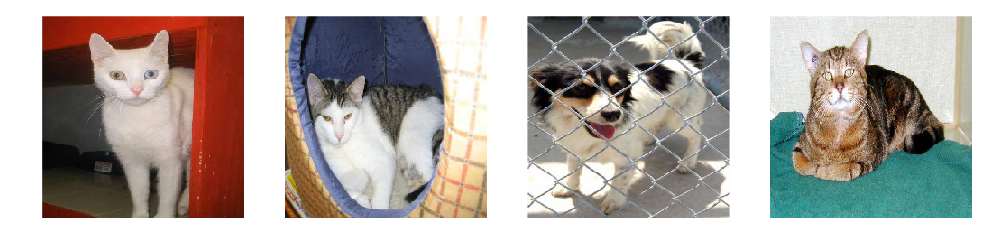

In [19]:
plots(imgs)

In [20]:
vgg.predict(imgs)

(array([ 1.,  1.,  1.,  1.], dtype=float32),
 array([0, 0, 1, 0]),
 ['cats', 'cats', 'dogs', 'cats'])

In [21]:
batches, t = vgg.test(path + 'test', batch_size=8)

Found 12500 images belonging to 1 classes.


TypeError: 'DirectoryIterator' object does not support indexing

In [26]:
results = [(b.split('/')[1][:-4], pred[1]) for b, pred in zip(batches.filenames, t)]

In [27]:
len(results)

12500

('9292', 1.1212444e-11)

In [29]:
df = pd.DataFrame(results, columns=['id', 'label'])

In [30]:
df.head()

,id,label
0,9292,1.121244e-11
1,12026,2.966539e-02
2,9688,2.259059e-09
3,4392,1.079610e-14
4,779,1.000000e+00


In [31]:
df['label'] = df['label'].clip(0.02, 0.98)

In [32]:
df.head()

,id,label
0,9292,0.020000
1,12026,0.029665
2,9688,0.020000
3,4392,0.020000
4,779,0.980000


In [33]:
df.to_csv('data/kaggle/dogscats/plain_vgg_clipped.csv', index=False)